In [1]:
import numpy as np

In [2]:
from lsst.sims.catUtils.utils import ObservationMetaDataGenerator

/opt/lsst/software/stack/stack/miniconda3-4.5.12-1172c30/Linux64/sims_catalogs/2.13.0.sims-3-g60469dd+6/python/lsst/sims/catalogs/db/dbConnection.py:555: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/opt/lsst/software/stack/stack/miniconda3-4.5.12-1172c30/Linux64/sims_catalogs/2.13.0.sims-3-g60469dd+6/python/lsst/sims/catalogs/db/dbConnection.py:555: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/opt/lsst/software/stack/stack/miniconda3-4.5.12-1172c30/Linux64/sims_catalogs/2.13.0.sims-3-g60469dd+6/python/lsst/sims/catalogs/db/dbConnection.py:555: UserWarning: Duplicate object type id 4 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally u

In [3]:
dbname = '/global/projecta/projectdirs/lsst/groups/SSim/DC2/minion_1016_desc_dithered_v4.db'

In [4]:
ObsMetaData = ObservationMetaDataGenerator(database=dbname)

In [5]:
# We want to select based on dithered RA and DEC ... there is no way to accesss the place where these are. Tried fooling it but does not quite work
# ObsMetaData.user_interface_to_opsim['fieldDec'] = ('descDitheredDec', None, float)
# ObsMetaData.user_interface_to_opsim['fieldRA'] = ('descDitheredRA', None, float)

In [6]:
# Select based on a larger range and then trim down

In [186]:
res = ObsMetaData.getObservationMetaData(boundLength=2, boundType='circle', fieldRA=(50, 64.), fieldDec=(-36., -28), expMJD=(59215, 59945))

In [187]:
len(res)

803

In [188]:
type(res[0])

lsst.sims.utils.ObservationMetaData.ObservationMetaData

In [189]:
from collections import OrderedDict as Odict

In [190]:
import pandas as pd

In [191]:
# Keep desired filters

In [215]:
df = pd.DataFrame(list(Odict(obsmd.summary['OpsimMetaData']) for obsmd in res if obsmd.bandpass in ("u", "g", "r", "i", "z", "y")))

In [216]:
df.columns

Index(['obsHistID', 'expDate', 'fieldRA', 'fieldDec', 'moonRA', 'moonDec',
       'rotSkyPos', 'filter', 'rawSeeing', 'sunAlt', 'moonAlt', 'dist2Moon',
       'moonPhase', 'expMJD', 'altitude', 'azimuth', 'visitExpTime', 'airmass',
       'fiveSigmaDepth', 'filtSkyBrightness', 'sessionID', 'fieldID', 'night',
       'visitTime', 'finRank', 'FWHMgeom', 'transparency', 'vSkyBright',
       'rotTelPos', 'lst', 'solarElong', 'sunAz', 'phaseAngle', 'rScatter',
       'mieScatter', 'moonBright', 'darkBright', 'wind', 'humidity',
       'slewDist', 'slewTime', 'ditheredRA', 'ditheredDec', 'FWHMeff',
       'propID', 'moonAZ', 'moonIllum', 'descDitheredDec', 'descDitheredRA',
       'descDitheredRotTelPos', 'opsim_version'],
      dtype='object')

In [217]:
from lsst.sims.utils import angularSeparation

In [218]:
X = df[['obsHistID', 'filter', 'FWHMeff', 'descDitheredRA', 'descDitheredDec', 'airmass', 'fiveSigmaDepth', 'expMJD']]

In [219]:
X.descDitheredRA = np.degrees(X.descDitheredRA)
X.descDitheredDec = np.degrees(X.descDitheredDec)

/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [220]:
# Make sure the corners are in

In [221]:
len(X)

803

In [222]:
X['d1'] = angularSeparation(56, -31, X.descDitheredRA.values, X.descDitheredDec.values)
X['d2'] = angularSeparation(56, -32, X.descDitheredRA.values, X.descDitheredDec.values)
X['d3'] = angularSeparation(58, -31, X.descDitheredRA.values, X.descDitheredDec.values)
X['d4'] = angularSeparation(58, -32, X.descDitheredRA.values, X.descDitheredDec.values)

/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: S

In [223]:
X.head()

,obsHistID,filter,FWHMeff,descDitheredRA,descDitheredDec,airmass,fiveSigmaDepth,expMJD,d1,d2,d3,d4
0,2338,u,0.973976,61.296912,-33.158042,1.026901,23.533959,59583.122443,4.979105,4.610611,3.529635,3.009639
1,2339,u,1.045868,59.411523,-34.045152,1.040078,23.456999,59583.122892,4.188356,3.515952,3.269356,2.362829
2,2340,u,1.055842,56.722628,-33.034913,1.056341,23.395354,59583.123341,2.125134,1.200965,2.305130,1.493700
3,2341,u,1.033885,63.296206,-32.183612,1.020731,23.471138,59583.123806,6.325260,6.182871,4.663411,4.490235
4,2342,u,1.041436,60.003857,-32.105575,1.032863,23.461927,59583.124255,3.586284,3.394953,2.034191,1.701641


In [224]:
# Keep the cases which have at least one of these poaints in the focal radius

In [225]:
Y = X.query('d1 < 1.75 | d2 < 1.75 | d3 < 1.75 |d4 < 1.75')#.obsHistID.size

In [226]:
len(Y)

178

In [227]:
Y.head()

,obsHistID,filter,FWHMeff,descDitheredRA,descDitheredDec,airmass,fiveSigmaDepth,expMJD,d1,d2,d3,d4
2,2340,u,1.055842,56.722628,-33.034913,1.056341,23.395354,59583.123341,2.125134,1.200965,2.305130,1.493700
4,2342,u,1.041436,60.003857,-32.105575,1.032863,23.461927,59583.124255,3.586284,3.394953,2.034191,1.701641
5,2343,u,1.050767,57.662165,-32.313445,1.048017,23.450586,59583.124704,1.930467,1.441651,1.344553,0.424321
14,5889,y,0.943714,59.594259,-32.389304,1.014194,22.200287,59588.094752,3.358719,3.066276,1.941651,1.404159
15,5890,y,0.949501,57.380888,-31.067834,1.024286,22.188418,59588.095201,1.185166,1.501371,0.534812,1.071155


In [228]:
Y.to_csv('pointings_in_range.csv', index=False)

In [229]:
Y['filter_cat'] = pd.Categorical(Y['filter'])

/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [236]:
for afilter in np.unique(Y['filter']): 
    
    sub = Y[Y['filter']==afilter] 
    print(afilter, sub[['airmass', 'FWHMeff', 'fiveSigmaDepth']].describe())

g          airmass    FWHMeff  fiveSigmaDepth
count  19.000000  19.000000       19.000000
mean    1.207116   0.899577       24.803000
std     0.166112   0.263846        0.376772
min     1.001766   0.572207       24.344462
25%     1.037137   0.642066       24.442848
50%     1.259000   0.882511       24.733053
75%     1.355189   1.136539       25.169075
max     1.456057   1.308461       25.329659
i          airmass    FWHMeff  fiveSigmaDepth
count  31.000000  31.000000       31.000000
mean    1.102788   0.759828       23.659677
std     0.126778   0.106157        0.284383
min     1.001705   0.587020       23.189266
25%     1.020638   0.691235       23.444697
50%     1.047191   0.708090       23.648425
75%     1.120574   0.825468       23.843219
max     1.466872   0.955330       24.241897
r          airmass    FWHMeff  fiveSigmaDepth
count  36.000000  36.000000       36.000000
mean    1.181029   0.815998       24.251218
std     0.132703   0.149485        0.232405
min     1.003053   0.60958

In [230]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Depth (5-sigma)')

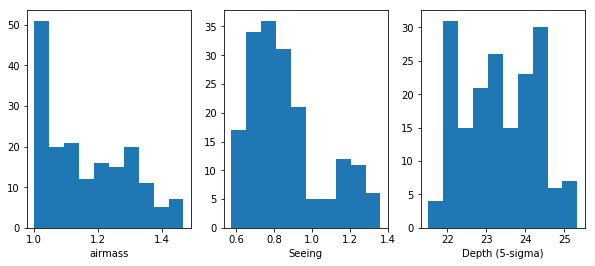

In [231]:
fig, ax = plt.subplots(1, 3, figsize=(10,4))
_ = ax[0].hist(Y.airmass)
_ = ax[1].hist(Y.FWHMeff)
_ = ax[2].hist(Y.fiveSigmaDepth)
ax[0].set_xlabel('airmass')
ax[1].set_xlabel('Seeing')
ax[2].set_xlabel('Depth (5-sigma)')

Should have done this with OpSimSummary instead ... next time.

In [232]:
from astropy.stats import sigma_clipped_stats

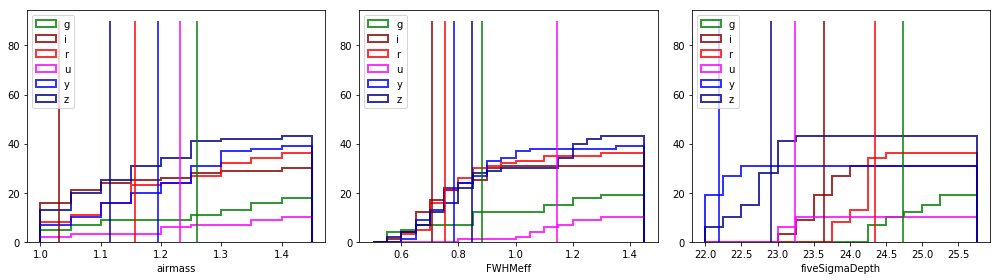

In [238]:
plt.figure(figsize=(14, 4))
i = 0
binlist = [np.arange(1., 1.5, 0.05), np.arange(0.5, 1.5, 0.05), np.arange(22, 26, 0.25)]
for qq, bins in zip(['airmass', 'FWHMeff', 'fiveSigmaDepth'], binlist):
    i += 1
    plt.subplot(1, 3, i)
    for afilter, col in zip(np.unique(Y['filter']), ['green', 'darkred', 'red', 'magenta', 'blue', 'darkblue']): 
        sub = Y[Y['filter']==afilter]
        mean, median, std = sigma_clipped_stats(sub[qq])
        
        plt.hist(sub[qq], bins=bins, label=afilter, histtype='step', 
                 alpha=0.8, color=col, lw=2, cumulative=True)
        plt.vlines(x=median, ymin=0, ymax=90, color=col)
        plt.legend(loc='upper left')
        plt.xlabel(qq)
plt.tight_layout()

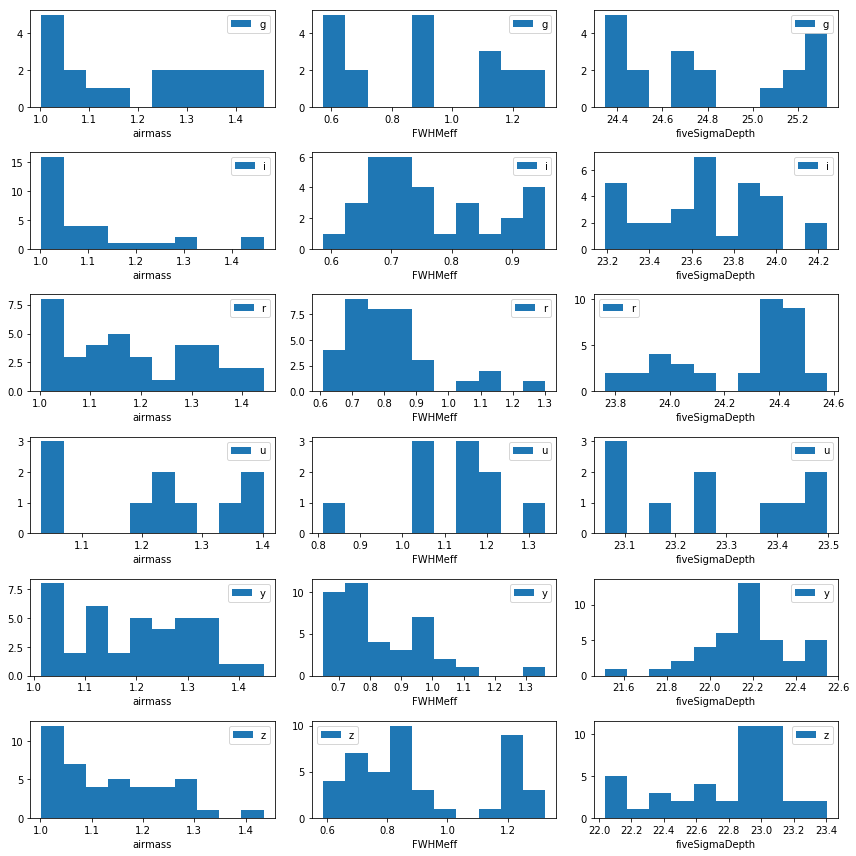

In [240]:
plt.figure(figsize=(12, 12))
i = 0 
for afilter in np.unique(Y['filter']): 
    
    sub = Y[Y['filter']==afilter] 
    for qq in ['airmass', 'FWHMeff', 'fiveSigmaDepth']:
        plt.subplot(6, 3, i+1)
        mean, median, std = sigma_clipped_stats(sub[qq])
        plt.hist(sub[qq], label=afilter)
        
        plt.legend(loc='best')
        plt.xlabel(qq)
        i += 1

plt.tight_layout()

In [241]:
from pandas.plotting import scatter_matrix

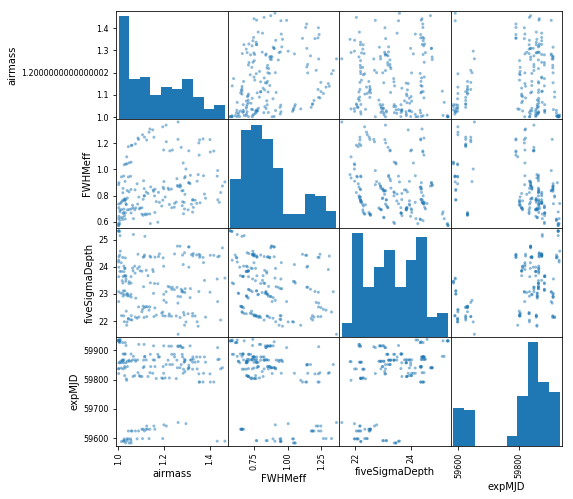

In [242]:
scatter_matrix(Y[['airmass', 'FWHMeff', 'fiveSigmaDepth', 'expMJD']], figsize=(8, 8))
plt.show()